# 2. Data Description

## Imports

In [1]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.util import compare_images

2022-01-04 11:23:17.330255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-04 11:23:17.330289: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Classes plot

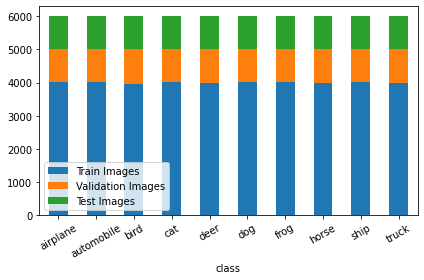

In [3]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
train_images_split, val_images_split, train_labels_split, val_labels_split = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)
n_train = [np.sum(train_labels_split==i) for i in range(len(classes))]
n_val = [np.sum(val_labels_split==i) for i in range(len(classes))]
n_test = [np.sum(test_labels==i) for i in range(len(classes))]

df = pd.DataFrame({'class': classes, 'Train Images': n_train, 'Validation Images':n_val, 'Test Images':n_test})

df.plot(x="class", kind="bar", stacked=True, rot=30)
plt.tight_layout()
plt.show()

## Plot training and test samples

### Fix randomness

In [4]:
np.random.seed(10)

### Plot

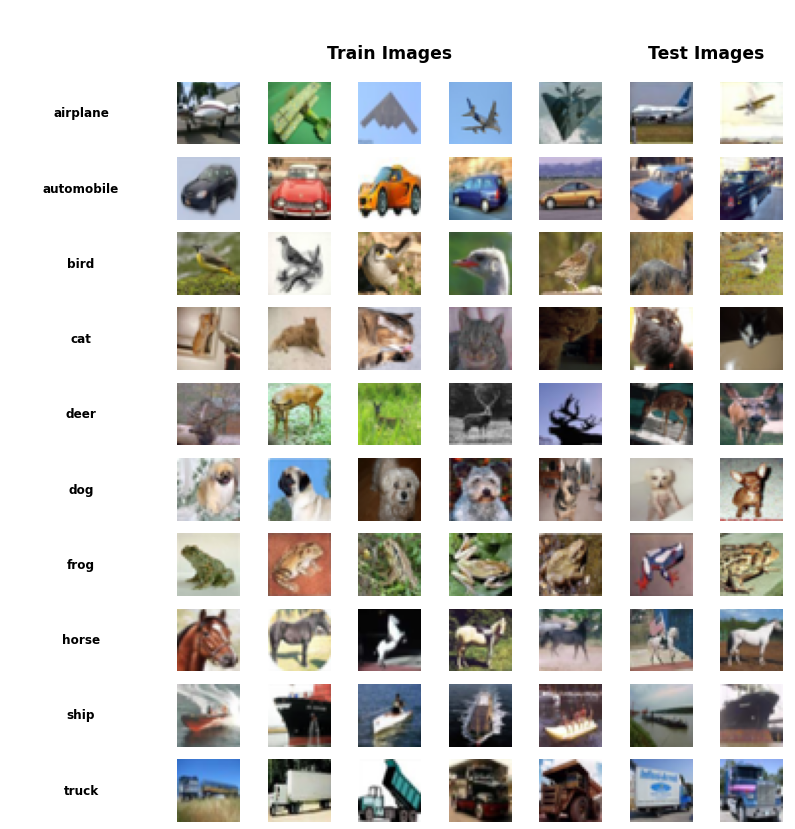

In [5]:
## Number of random images to show
N_show_train = 5
N_show_test = 2

fig, axs = plt.subplots(len(classes)+1,N_show_train+N_show_test+1, 
        figsize=(14,15),
        gridspec_kw={'width_ratios': [2]+[1 for _ in range(N_show_train+N_show_test)]})

for i in range(N_show_train+N_show_test+1):
    axs[0][i].remove()

ax_train = fig.add_subplot(len(classes)+1,N_show_train+N_show_test+1,(2,N_show_train+1))
ax_train.text(0.5, 0.25, "Train Images", horizontalalignment='center', verticalalignment='center', fontweight=800, fontsize="xx-large")
ax_train.set_axis_off()
ax_test = fig.add_subplot(len(classes)+1,N_show_train+N_show_test+1,(N_show_train+2,N_show_train+N_show_test +1))
ax_test.text(0.5, 0.25, "Test Images", horizontalalignment='center', verticalalignment='center', fontweight=800, fontsize="xx-large")
ax_test.set_axis_off()

for label, c in enumerate(classes):
    
    axs[label+1][0].text(0.5, 0.5, c, horizontalalignment='center', verticalalignment='center', fontweight=550, fontsize="large")
    axs[label+1][0].set_axis_off()

    train_images_idxs =  np.random.choice(np.where(train_labels[:,0]==label)[0], N_show_train)
    for j,i in enumerate(train_images_idxs):
        axs[label+1][j+1].set_axis_off()
        axs[label+1][j+1].imshow(train_images[i:i+1][0])

    test_images_idxs =  np.random.choice(np.where(test_labels[:,0]==label)[0], N_show_test)
    for j,i in enumerate(test_images_idxs):
        axs[label+1][j+N_show_train+1].set_axis_off()
        axs[label+1][j+N_show_train+1].imshow(test_images[i:i+1][0])

plt.show()

# 2.1 EDA

To start EDA we are going to convert images in RGB format from 0 to 255 to 0 to 1 scale.
This new format has the same information as the previous but it allows to develop operations and transformations a lot easier.

In [6]:
train_images = train_images/255.
test_images = test_images/255.

## Mean images

In [7]:
class_images = [None for _ in range(len(classes))]

mean_image = np.mean(train_images,axis=0)

for i,c in enumerate(classes):
    class_images[i] = np.mean(train_images[np.where(train_labels==i)[0]],axis=0)

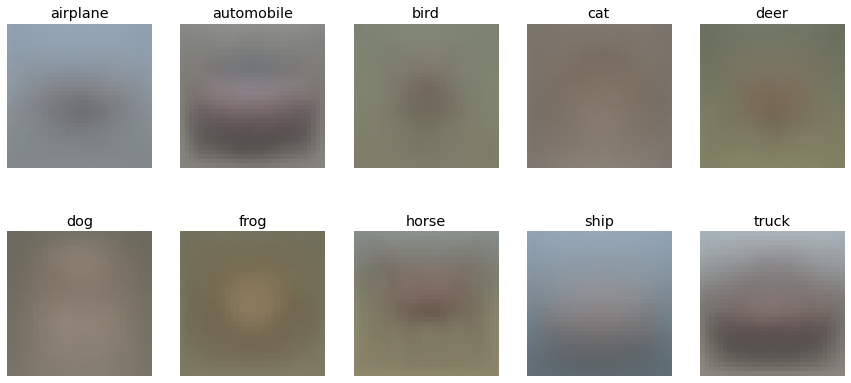

In [8]:
fig, axs = plt.subplots(2,5, figsize=(15,7))
for i,c in enumerate(classes):
    axs[i//5, i%5].set_title(c, fontsize="x-large")
    axs[i//5, i%5].imshow(class_images[i])
    axs[i//5, i%5].set_axis_off()

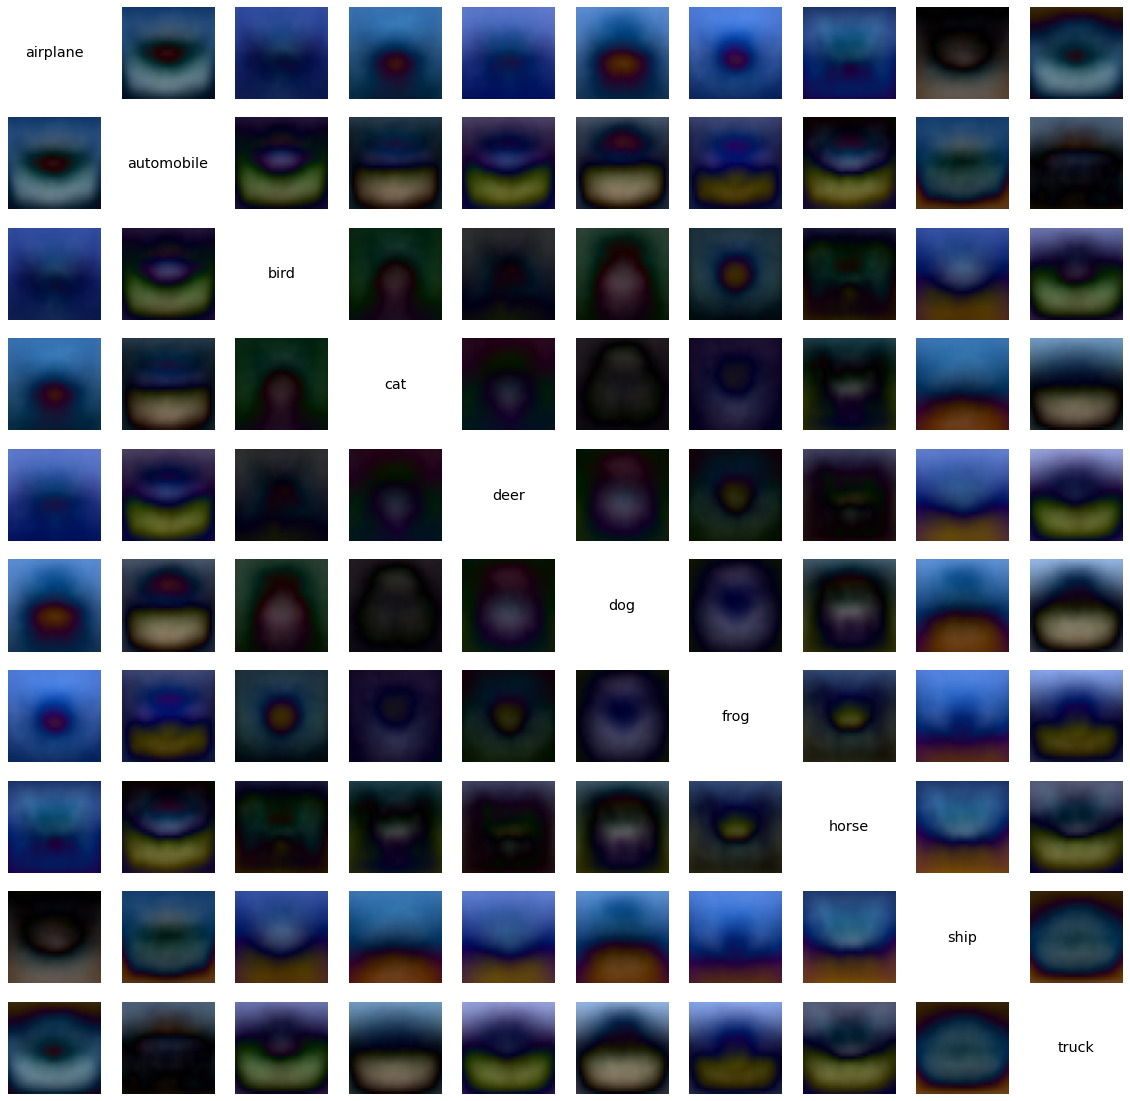

In [9]:
fig, axs = plt.subplots(len(classes), len(classes), figsize=(20,20))

for i1,c1 in enumerate(classes):
    # axs[0,i1].set_title(c1)
    # axs[0,i1].set_ylabel(c1)
    for i2,c2 in enumerate(classes):
        if i1==i2:
            axs[i1,i2].text(0.5, 0.5, c1, horizontalalignment='center', verticalalignment='center', fontweight=500, fontsize="x-large")
        else:
            axs[i1,i2].imshow(compare_images(class_images[i1],class_images[i2])*2.5)
        axs[i1,i2].set_axis_off()

plt.show()

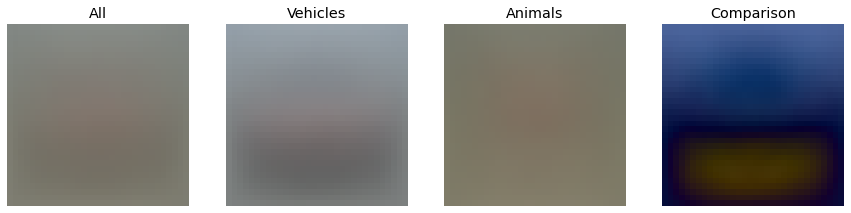

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15,10))

mean_image_vehicles = (class_images[0]+class_images[1]+class_images[8]+class_images[9])/4
mean_image_animals = (class_images[2]+class_images[3]+class_images[4]+class_images[5]+class_images[6]+class_images[7])/6

axs[0].set_title("All", fontsize="x-large")
axs[0].imshow(mean_image)
axs[0].set_axis_off()

axs[1].set_title("Vehicles", fontsize="x-large")
axs[1].imshow(mean_image_vehicles)
axs[1].set_axis_off()

axs[2].set_title("Animals", fontsize="x-large")
axs[2].imshow(mean_image_animals)
axs[2].set_axis_off()

axs[3].set_title("Comparison", fontsize="x-large")
axs[3].imshow(compare_images(mean_image_vehicles,mean_image_animals)*2.5)
axs[3].set_axis_off()



## Variance images

In [11]:
class_var_images = [None for _ in range(len(classes))]

var_image = np.mean((train_images-mean_image)*(train_images-mean_image),axis=0)

for i in range(len(classes)):
    normalized_train_images = (train_images[np.where(train_labels==i)[0]]-class_images[i])
    class_var_images[i] = np.mean(normalized_train_images*normalized_train_images, axis=0)


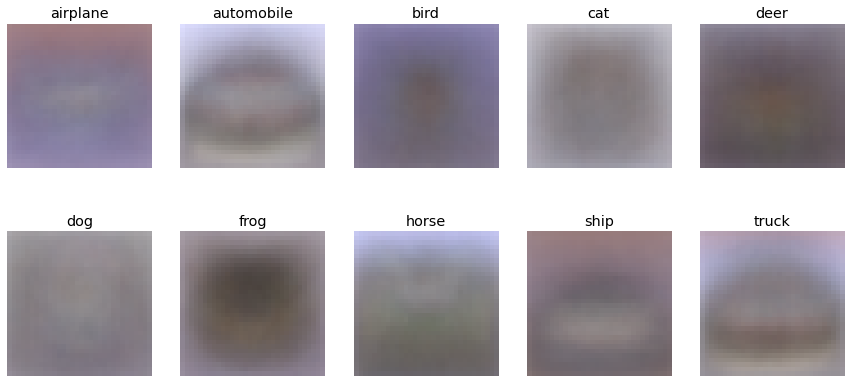

In [12]:
fig, axs = plt.subplots(2,5, figsize=(15,7))
for i,c in enumerate(classes):
    axs[i//5, i%5].set_title(c, fontsize="x-large")
    axs[i//5, i%5].imshow(class_var_images[i]/np.amax(class_var_images))
    
    axs[i//5, i%5].set_axis_off()

### Luminance histograms

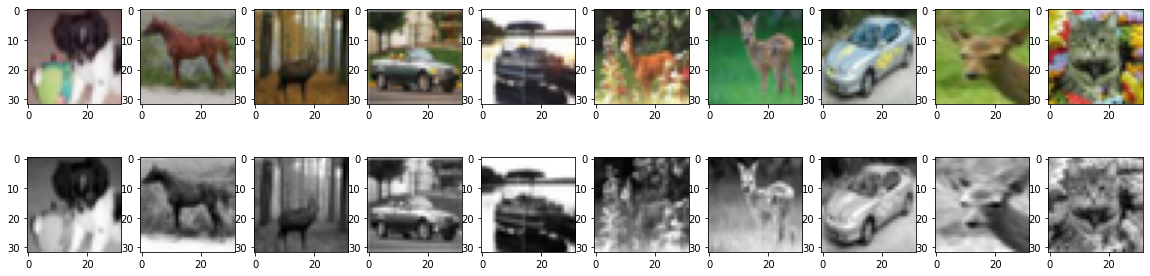

In [13]:
luminance_images = (0.2126*train_images[:,:,:,0] + 0.7152*train_images[:,:,:,1] + 0.0722*train_images[:,:,:,2])

## Plot some examples to check the transformation
fig, axs = plt.subplots(2,10, figsize=(20,5))
for idx,i in enumerate(np.random.choice(luminance_images.shape[0],10)):
    axs[0,idx].imshow(train_images[i])
    axs[1,idx].imshow(luminance_images[i],cmap='gray')
plt.show()


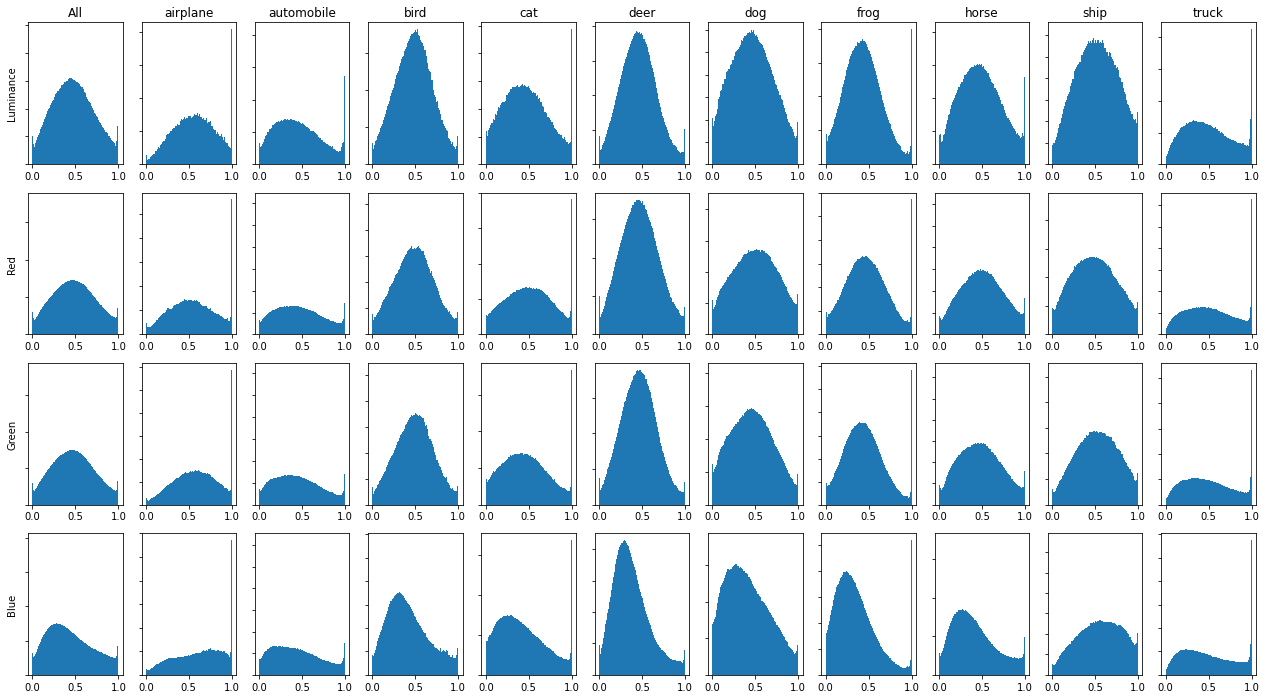

In [14]:
fig, axs = plt.subplots(4,len(classes)+1, figsize=(22,12))

axs[0,0].hist(luminance_images.flatten(), 255)
axs[0,0].set_yticklabels([])
axs[0,0].set_title("All")
axs[0,0].set_ylabel('Luminance')


axs[1,0].hist(train_images[:,:,:,0].flatten(), 255)
axs[1,0].set_yticklabels([])
axs[1,0].set_ylabel('Red')

axs[2,0].hist(train_images[:,:,:,1].flatten(), 255)
axs[2,0].set_yticklabels([])
axs[2,0].set_ylabel('Green')

axs[3,0].hist(train_images[:,:,:,2].flatten(), 255)
axs[3,0].set_yticklabels([])
axs[3,0].set_ylabel('Blue')


for i,c in enumerate(classes):
    luminance_class_images = luminance_images[np.where(train_labels==i)[0]]
    axs[0,i+1].hist(luminance_class_images.flatten(), 255)
    axs[0,i+1].set_yticklabels([])
    axs[0,i+1].set_title(c)

    class_images = train_images[np.where(train_labels==i)[0]]
    axs[1,i+1].hist(class_images[:,:,:,0].flatten(), 255)
    axs[1,i+1].set_yticklabels([])
    axs[2,i+1].hist(class_images[:,:,:,1].flatten(), 255)
    axs[2,i+1].set_yticklabels([])
    axs[3,i+1].hist(class_images[:,:,:,2].flatten(), 255)
    axs[3,i+1].set_yticklabels([])



plt.show()


## Sobol filters

In [15]:
import cv2

In [16]:
bottom_sobel = np.array([[-1, -2, -1], 
                         [0, 0, 0], 
                         [1, 2, 1]])
                         
right_sobel = np.array([[-1, 0, 1], 
                        [-2, 0, 2], 
                        [-1, 0, 1]])

In [21]:

train_images_horizontal = np.array([cv2.filter2D(image, -1, bottom_sobel) for image in train_images])
train_images_vertical = np.array([cv2.filter2D(image, -1, right_sobel) for image in train_images])
train_images_cornel = train_images_horizontal*train_images_vertical

## Plot some examples to check the transformation
# fig, axs = plt.subplots(4,6, figsize=(14,7))
# for axx in axs:
#     for a in axx:
#         a.set_axis_off()

# for idx,i in enumerate(np.random.choice(train_images.shape[0],6)):
#     axs[0,idx].imshow(train_images[i])
#     axs[1,idx].imshow(train_images_horizontal[i])
#     axs[2,idx].imshow(train_images_vertical[i])
#     axs[3,idx].imshow(train_images_cornel[i])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

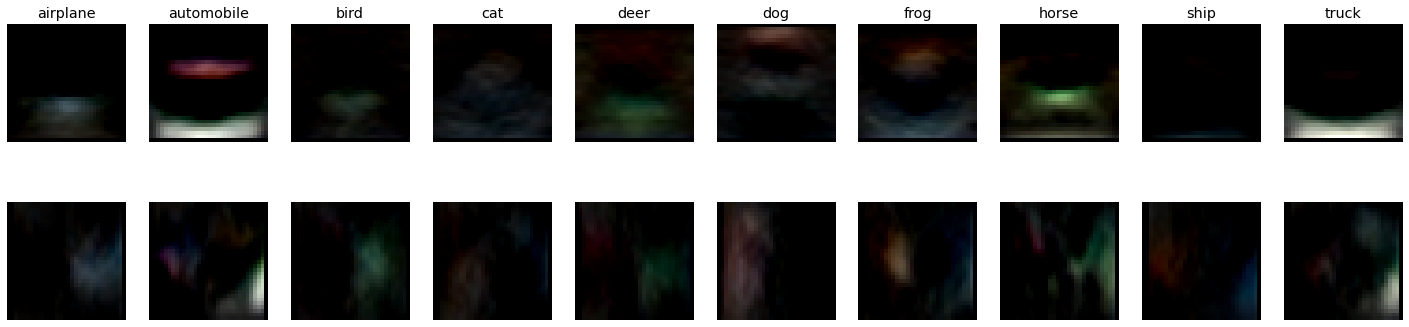

In [22]:
class_images_horizontal = [None for _ in range(len(classes))]
class_images_vertical = [None for _ in range(len(classes))]

for i,c in enumerate(classes):
    class_images_horizontal[i] = np.mean(train_images_horizontal[np.where(train_labels==i)[0]],axis=0)
    class_images_vertical[i] = np.mean(train_images_vertical[np.where(train_labels==i)[0]],axis=0)

fig, axs = plt.subplots(2,10, figsize=(25,6))
for i,c in enumerate(classes):
    axs[0,i].set_title(c, fontsize="x-large")
    
    axs[0,i].imshow(class_images_horizontal[i]*3)
    axs[0,i].set_axis_off()

    axs[1,i].imshow(class_images_vertical[i]*3)
    axs[1,i].set_axis_off()